<a href="https://colab.research.google.com/github/Pawanme9034/Deep_learning/blob/main/dog___v__cat__image_classification_mode_in_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

coyp the api command form kaggle  AND past it with ! mark..

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 208MB/s]
100% 1.06G/1.06G [00:10<00:00, 105MB/s]


we got dog-vs-cats data in .zip file, to unzip it we use folling command

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

generators_--

genrators are usefull in working with larg size of data


In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


normlize the numpy array
normalization is required because of our data is in numpy array formate which have size of 0 to 255, we need to change it in between 0 to 1.

In [11]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

CNN model_

In [12]:
# create CNN model

model = Sequential()
# first convinationl layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
# polling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
# flatten layer
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

compiling the model

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

training the model

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 102ms/step - loss: 1.1480 - accuracy: 0.5952 - val_loss: 0.6188 - val_accuracy: 0.6604
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5686 - accuracy: 0.7057 - val_loss: 0.5123 - val_accuracy: 0.7516
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4860 - accuracy: 0.7696 - val_loss: 0.4642 - val_accuracy: 0.7814
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4109 - accuracy: 0.8101 - val_loss: 0.4699 - val_accuracy: 0.7824
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3446 - accuracy: 0.8461 - val_loss: 0.4371 - val_accuracy: 0.7946
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2813 - accuracy: 0.8824 - val_loss: 0.4810 - val_accuracy: 0.7930
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2029 - accuracy: 0.9197 - val_loss: 0.6568 - val_ac

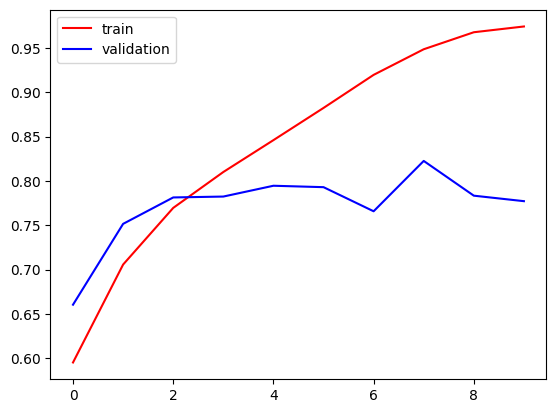

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

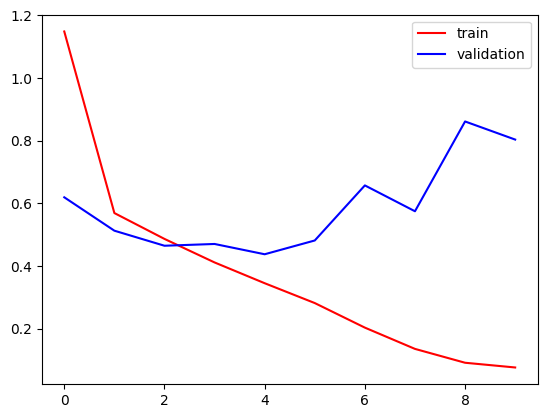

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()